In [12]:
import matplotlib.pyplot as plt
import pickle
import pandas as pd

In [7]:
with open('data100.pk', 'rb') as handle:
    data = pickle.load(handle)

In [8]:
data.sort_values(by=['Length_MeetTijd'], ascending=True).head(10)

,MeetTijd,HR(bpm),SpO2(%),NIBP(mmHg),IcNaOk,Length_MeetTijd,Percentage HR nan,Percentage SpO2 nan,Percentage NIBP nan
2182,"[13:19:23, 13:20:24, 13:21:24, 13:22:25, 13:23...","[66, 63, 62, 61, 60, 60, 60, 60]","[92, 94, 94.5, 97, 96, 96, 95, 97]","[141, 127, 127, 127, 123, 123, 123, 122]",0.0,8,0.0,0.0,0.0
3459,"[22:02:21, 22:03:21, 22:04:22, 22:05:23, 22:06...","[84, 110, 154, 113, 138, 94, 68, 69, 70, 84, 75]","[94, 95, 99, 87, 99, 99, 99, 99, 99, 99, 99]","[201, 201, 139, 139, 139, 161, 161, 151, 151, ...",1.0,11,0.0,0.0,0.0
458,"[20:27:56, 20:28:56, 20:29:57, 20:30:57, 20:31...","[69, 67, 71, 117, 83, 78, 73, 70, 67, 67, 89, ...","[98, 98, 98, 79, 81, 93, 99, 99, 99, 99, 99, 9...","[142, 142, 142, 142, 142, 142, 142, 142, 142, ...",1.0,13,0.0,0.0,0.0
5991,"[13:03:20, 13:04:21, 13:05:22, 13:06:22, 13:07...","[80, 96, 84, 81, 75, 77, 82, 81, 79, 86, 78, 8...","[96.21, 95.02, 96.56, 96.45, 96.98, 95.62, 96....","[137, 137, 141, 141, 141, 135, 135, 135, 132, ...",0.0,19,0.0,0.0,0.0
5086,"[20:34:07, 20:35:08, 20:36:09, 20:37:10, 20:38...","[99, 90, 83, 78, 71, 70, 63, 68, 69, 68, 69, 6...","[98.5, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98,...","[164, 164, 164, 131, 131, 131, 129, 129, 129, ...",1.0,20,0.0,0.0,0.0
3873,"[21:35:21, 21:36:22, 21:37:23, 21:38:24, 21:39...","[95, 91, 90, 92, 87, 85, 89, 98, 64, 61, 62, 6...","[95, 97, 95, 91.5, 99, 92, 99, 99, 99, 99, 99,...","[198, 198, 198, 183, 193, 193, 193, 116, 116, ...",1.0,21,0.0,0.0,0.0
2853,"[21:19:08, 21:20:09, 21:21:09, 21:22:09, 21:23...","[93, 98, 100, 94, 96, 100, 94, 78, 70, 70, 68,...","[95.34, 95.06, 95.39, 95.04, 95.08, 95.54, 98....","[166, 165, 165, 165, 159, 159, 159, 126, 126, ...",1.0,22,0.0,0.0,0.0
1751,"[17:20:04, 17:21:05, 17:22:05, 17:23:06, 17:24...","[103, 101, 103, 98, 98, 101, 101, 102, 99, 107...","[97.57, 97.41, 96.85, 98.06, 97.46, 98.8, 98.2...","[122, 126, 126, 126, 130, 130, 130, 130, 118, ...",1.0,33,0.0,0.0,0.0
3510,"[14:02:42, 14:03:43, 14:04:43, 14:05:44, 14:06...","[105, 111, 116, 79, 84, 100, 81, 78, 79, 81, 7...","[97, 97.33, 96.08, 95.08, 98.5, 98.5, 99, 97, ...","[124, 124, 124, 124, 124, 158, 153, 153, 153, ...",0.0,37,0.0,0.0,0.0
4675,"[14:06:54, 14:07:55, 14:08:56, 14:09:56, 14:10...","[55, 50, 66, 52, 57, 57, 48, 46, 63, 42, 126, ...","[98, 97, 95, 95, 91.5, 91, 91, 99, 99, 99, 98,...","[136, 136, 136, 136, 130, 130, 130, 135, 135, ...",0.0,38,0.0,0.0,0.0


In [10]:
instance1 = data.loc[3510]
instance2 = data.loc[5075]
instance3 = data.loc[6535]
instance4 = data.loc[5216]

<AxesSubplot:>

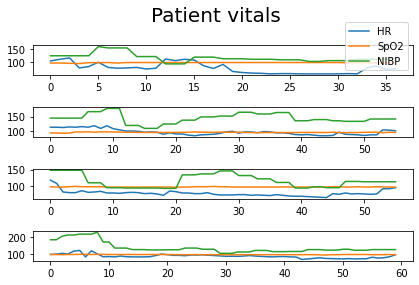

In [14]:
fig, axes = plt.subplots(nrows=4, ncols=1)
plt.suptitle('Patient vitals',fontsize=20)
fig.tight_layout()
df1 = pd.DataFrame({'Time':instance1['MeetTijd'], 'HR': instance1['HR(bpm)'],'SpO2': instance1['SpO2(%)'],'NIBP': instance1['NIBP(mmHg)']},dtype=float)
df2 = pd.DataFrame({'Time':instance2['MeetTijd'], 'HR': instance2['HR(bpm)'],'SpO2': instance2['SpO2(%)'],'NIBP': instance2['NIBP(mmHg)']},dtype=float)
df3 = pd.DataFrame({'Time':instance3['MeetTijd'], 'HR': instance3['HR(bpm)'],'SpO2': instance3['SpO2(%)'],'NIBP': instance3['NIBP(mmHg)']},dtype=float)
df4 = pd.DataFrame({'Time':instance4['MeetTijd'], 'HR': instance4['HR(bpm)'],'SpO2': instance4['SpO2(%)'],'NIBP': instance4['NIBP(mmHg)']},dtype=float)
df1['Time'] = df1['Time'].astype(str)
df2['Time'] = df2['Time'].astype(str)
df3['Time'] = df3['Time'].astype(str)
df4['Time'] = df4['Time'].astype(str)
df1.set_index('Time')
df2.set_index('Time')
df3.set_index('Time')
df4.set_index('Time')


df1.plot(ax=axes[0])
df2.plot(ax=axes[1],legend=None)
df3.plot(ax=axes[2],legend=None)
df4.plot(ax=axes[3],legend=None)

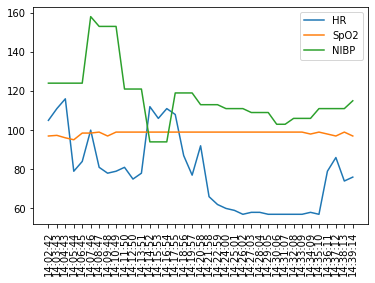

In [15]:
ax1 = df1.plot(xticks=df1.index);
ax1.set_xticklabels(df1['Time'])
plt.xticks(rotation=90);